This analysis investigates the correlation between the Debt to Equity ratio and ESG ratings. The underlying hypothesis posits that highly leveraged firms, facing stricter financial constraints, would prioritize debt servicing over "discretionary" ESG initiatives, resulting in lower sustainability scores.
The dataset was segmented into leverage quartiles to observe trends and break points in this relationship.

/tmp/ipython-input-39720112.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  debt_analysis = df_clean.groupby("Debt_Category")["ESG_Rating_Score"].mean().reset_index()
/tmp/ipython-input-39720112.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debt_analysis, x="Debt_Category", y="ESG_Rating_Score", palette="Paired")


Analisi Debito vs ESG:
    Debt_Category  ESG_Rating_Score
0        Low Debt          7.333190
1     Medium Debt          7.458683
2       High Debt          7.582279
3  Very High Debt          7.692154


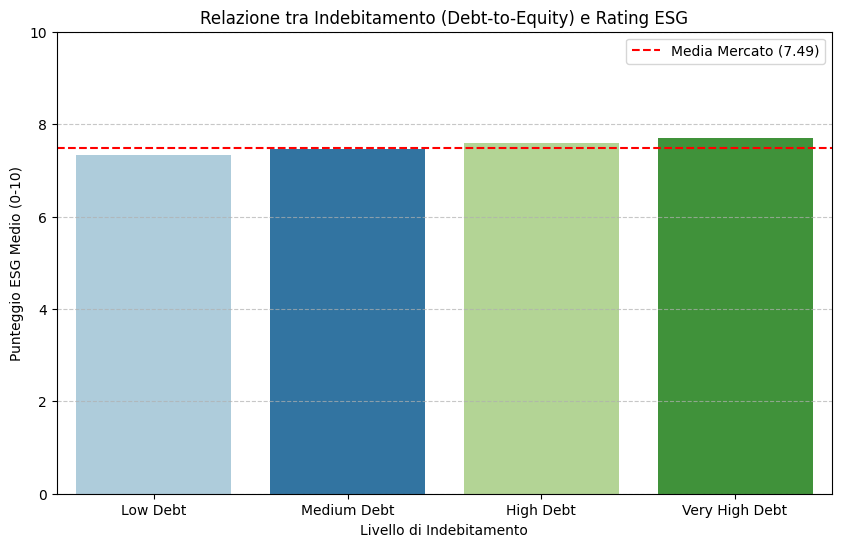

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/content/esg_financial_dataset_with_sector.csv")
df_clean = df.dropna(subset=["ESG_Rating_Score", "P/E Ratio"])
df_clean = df_clean[(df_clean["P/E Ratio"] < 200) & (df_clean["P/E Ratio"] > 0)]

quartiles = df_clean["Debt to Equity"].quantile([0, .25, .50, .75, 1]).to_list()
labels = ["Q1","Q2","Q3","Q4"]

df_clean["Debt_Category"] = pd.qcut(
    df_clean["Debt to Equity"],
    q=4,
    labels=["Low Debt", "Medium Debt", "High Debt", "Very High Debt"]
)

debt_analysis = df_clean.groupby("Debt_Category")["ESG_Rating_Score"].mean().reset_index()

print("Debt vs ESG:")
print(debt_analysis)

plt.figure(figsize=(10, 6))
sns.barplot(data=debt_analysis, x="Debt_Category", y="ESG_Rating_Score", palette="Paired")
overall_mean = df_clean["ESG_Rating_Score"].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', label=f"Market Mean ({overall_mean:.2f})")
plt.title("Debt-to-Equity Relation and ESG Rating")
plt.xlabel("Livello di Indebitamento")
plt.ylabel("ESG Average Score (0-10)")
plt.ylim(0, 10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The empirical evidence contradicts the initial "financial constraints" hypothesis. The analysis indicates a positive correlation between leverage and ESG performance: companies in the highest debt quartile exhibited a superior average ESG score (7.69) compared to those with low debt (7.33). This phenomenon can be attributed to the nature of capital intensive industries (Utilities, Infrastructure). These sectors require significant debt financing for operations but are simultaneously subject to rigorous regulatory scrutiny and are primary issuers of Green Bonds. Thus, high leverage in this context likely signals funded capital expenditure toward energy transition and infrastructure upgrades, rather than financial mismanagement.